<h1>Import Nescessary Library</h1>

In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras.api.optimizers import Adam
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

<h1>Preprocess (Cleanse Data)</h1>

In [18]:
# Import Data
df = pd.read_csv("Dataset/Sentiment_Stock_data.csv", usecols=["Sentiment", "Sentence"])
# print(df.to_string)


Deal With Null Data

In [19]:
# Drop Null value rows
df = df.dropna()

# Check Null
print(df.isnull().sum())
# print(df.to_string)

Sentiment    0
Sentence     0
dtype: int64


Deal with Error Format Data

In [20]:
special_char= r'[a-zA-Z0-9]+(?:\s+[a-zA-Z0-9]+)*'

# Find rows where "Sentence" contains special characters
special_char_row = df[~df["Sentence"].str.contains(special_char, regex=True)].index
# print(len(special_char_row))

# Drop special character rows
df.drop(special_char_row, axis=0, inplace=True)

error_encode = "+ñ"

# Find rows where "Sentence" contains special characters
error_encode_row = df[df["Sentence"].str.contains(error_encode, regex=False)].index
# print(len(error_encode_row))

# Drop error encoded rows
df.drop(error_encode_row, axis=0, inplace=True)

# print(df.to_string)

<h1> Split Train & Test Data </h1>

In [21]:
# Split the entire DataFrame
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separate features (X) and labels (Y)
X_train = train_df["Sentence"]
Y_train = train_df["Sentiment"]
X_test = test_df["Sentence"]
Y_test = test_df["Sentiment"]

# print(df[df["Sentence"].str.match(X_train[1])])

<h1>Text Tokenization & Padding</h1>

In [22]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert sentences to sequences of token ex. [340, 2, 14467, 1, 72, 15, 48, 220, 2, 352, 62, 702, 2, 73, 6316, 14, 9, 281, 1, 72, 9, 683]
tokenized = tokenizer.texts_to_sequences(X_train)

# Padding Sentence to same length
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=30, padding="post")
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=30, padding="post")

# Change to numpy array for training
Y_train = np.array(Y_train, dtype=np.int32)
Y_test = np.array(Y_test, dtype=np.int32)

In [23]:
# #************** For view indexing *******
# word_index = tokenizer.word_index  # vocabulary
# index_word = {v: k for k, v in word_index.items()}  # token to word mapping

# print(df[df["Sentence"].str.contains("saudi arabia about", case=False)])
# print(X_train[0]) # Numpy array
# print(Y_train[0]) # Pandas Series
# # Function to decode tokenized sequences back to text
# def decode_sequence(sequence: list):
#     for pharse in sequence:
#         print(pharse)
#         print(" ".join(index_word.get(token, "<UNK>") for token in pharse), "\n")

# # Decode and compare tokenized sequences
# decode_sequence(tokenized)

In [24]:
print(type(X_train), X_train.dtype, X_train.shape)
print(type(Y_train), Y_train.dtype, Y_train.shape)
# print([X_train[x] for x in range(5)])
# print([Y_train[y] for y in range(5)])


<class 'numpy.ndarray'> int32 (86939, 30)
<class 'numpy.ndarray'> int32 (86939,)


<h1> Build Model </h1>

In [25]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=30, mask_zero=True))
model.add(Dropout(0.3))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, activation="relu", kernel_regularizer=))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())

c:\Users\User\OneDrive\Desktop\My Works\2567_2\AI\ai_venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Compile Model

In [26]:
model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

Training Model

Epoch 1/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.5183 - loss: 0.6987 - val_accuracy: 0.5230 - val_loss: 0.6923
Epoch 2/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.5595 - loss: 0.7512 - val_accuracy: 0.5290 - val_loss: 0.6927
Epoch 3/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.6091 - loss: 0.6544 - val_accuracy: 0.5311 - val_loss: 0.7005
Epoch 4/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.6389 - loss: 0.6227 - val_accuracy: 0.5295 - val_loss: 0.7194


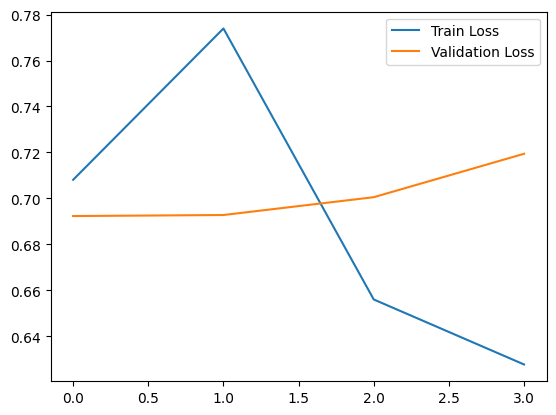

In [27]:
history = model.fit(X_train, Y_train, epochs=4, batch_size=64, validation_split=0.2, verbose=1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Evaluate Model

In [28]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {acc}")

680/680 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5255 - loss: 0.7202
Test loss: 0.7196702361106873
Test accuracy: 0.5250517725944519


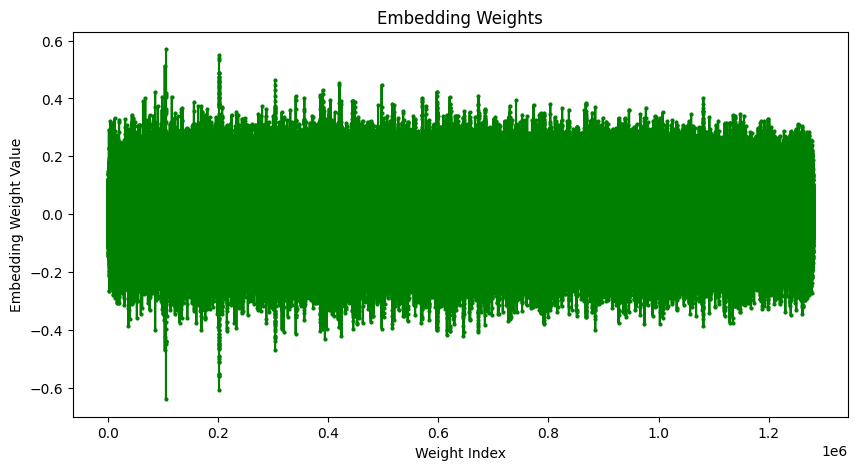

In [29]:
embedding_weights = model.layers[0].get_weights()[0]  # Extracting embedding weights
embedding_weights_flat = embedding_weights.flatten()

# Create an index for the weights
embedding_index = np.arange(len(embedding_weights_flat))

# Plot the embedding weights
plt.figure(figsize=(10, 5))
plt.plot(embedding_index, embedding_weights_flat, marker='o', markersize=2, color='green')
plt.title('Embedding Weights')
plt.xlabel('Weight Index')
plt.ylabel('Embedding Weight Value')
plt.show()


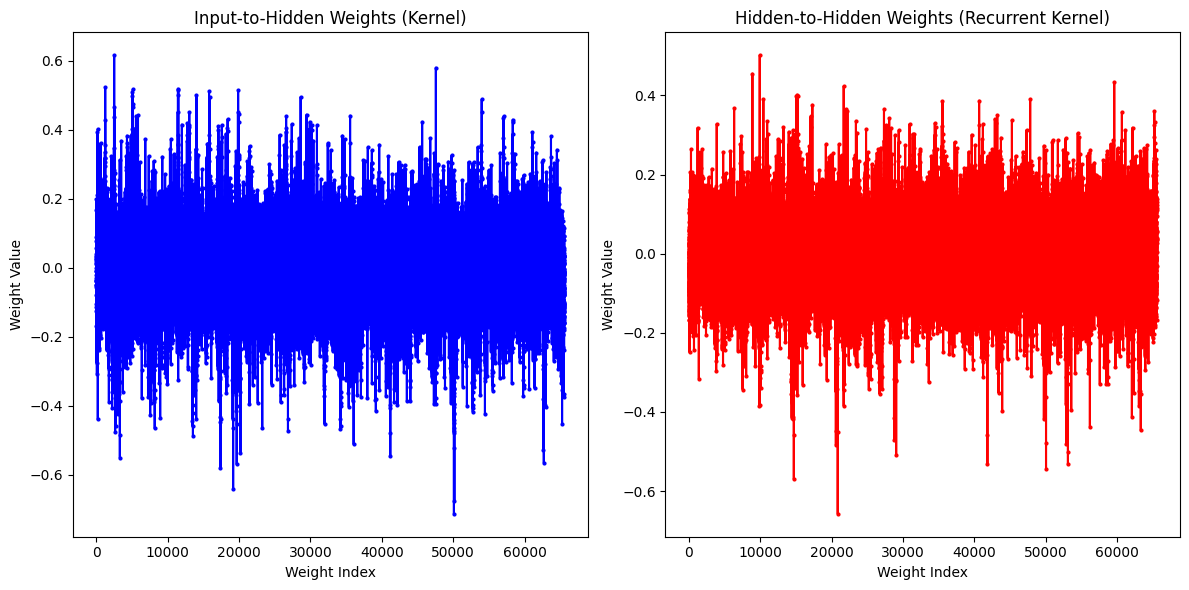

In [31]:
kernel, recurrent_kernel, bias = model.layers[2].get_weights()  # Extract weights from LSTM layer
kernel_flat = kernel.flatten()
recurrent_kernel_flat = recurrent_kernel.flatten()

# Create indices for the weights
kernel_index = np.arange(len(kernel_flat))
recurrent_kernel_index = np.arange(len(recurrent_kernel_flat))

# Plotting the kernel weights
plt.figure(figsize=(12, 6))

# Plot kernel weights (input-to-hidden)
plt.subplot(1, 2, 1)
plt.plot(kernel_index, kernel_flat, marker='o', linestyle='-', markersize=2, color='blue')
plt.title('Input-to-Hidden Weights (Kernel)')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')

# Plot recurrent kernel weights (hidden-to-hidden)
plt.subplot(1, 2, 2)
plt.plot(recurrent_kernel_index, recurrent_kernel_flat, marker='o', linestyle='-', markersize=2, color='red')
plt.title('Hidden-to-Hidden Weights (Recurrent Kernel)')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')

plt.tight_layout()
plt.show()
